In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
df_customers = pd.read_csv("./Dataset/customers.csv", parse_dates=True)
df_orders = pd.read_csv("./Dataset/orders.csv", parse_dates=True)

In [5]:
df_customers.head()

,customer_id,name,city,age,join_date,marketing_channel,loyalty_tier
0,C001,Mira Ratnasari,Batam,54.0,2023-10-08,Organic Search,Bronze
1,C002,Omar Kusuma,Depok,50.0,2024-01-04,Google Ads,Silver
2,C003,Umar Hidayat,Solo,41.0,2023-06-17,TikTok Ads,Silver
3,C004,Sandi Setiawan,Surabaya,32.0,2023-09-12,Instagram,Bronze
4,C005,Kartika Putri,Jakarta,49.0,2023-11-08,Organic Search,Bronze


In [6]:
df_orders.head()

,order_id,date,customer_id,device,payment_method,category,product_name,units,unit_price,rating
0,O1001,2024-01-16,C052,Mobile,Transfer,Beauty,Sheet Mask Set,1,217000,4.5
1,O1002,2024-01-16,C015,Desktop,Qris,Accessories,Laptop Sleeve Air,1,156000,4.6
2,O1003,2024-01-03,C061,Desktop,Qris,Sports,Resistance Band Set,1,175000,4.6
3,O1004,2024-01-20,C021,Mobile,Credit Card,Sports,Water Bottle Insulated,1,326000,4.7
4,O1005,2024-01-24,C024,Mobile,E-Wallet,Accessories,Keychain Multitool,1,259000,3.5


In [7]:
df_customers.isna().sum()

customer_id          0
name                 0
city                 0
age                  3
join_date            0
marketing_channel    0
loyalty_tier         0
dtype: int64

In [8]:
df_customers['age'] = df_customers['age'].fillna(df_customers['age'].mean())
df_customers.isna().sum()

customer_id          0
name                 0
city                 0
age                  0
join_date            0
marketing_channel    0
loyalty_tier         0
dtype: int64

In [9]:
df_customers['join_date'] = pd.to_datetime(df_customers['join_date'])

In [10]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        80 non-null     object        
 1   name               80 non-null     object        
 2   city               80 non-null     object        
 3   age                80 non-null     float64       
 4   join_date          80 non-null     datetime64[ns]
 5   marketing_channel  80 non-null     object        
 6   loyalty_tier       80 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 4.5+ KB


In [11]:
df_orders.isna().sum()

order_id           0
date               0
customer_id        0
device             0
payment_method     0
category           0
product_name       0
units              0
unit_price         0
rating            10
dtype: int64

In [12]:
df_orders['rating'] = df_orders['rating'].fillna(0)
df_orders.isna().sum()

order_id          0
date              0
customer_id       0
device            0
payment_method    0
category          0
product_name      0
units             0
unit_price        0
rating            0
dtype: int64

In [13]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

In [14]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        200 non-null    object        
 1   date            200 non-null    datetime64[ns]
 2   customer_id     200 non-null    object        
 3   device          200 non-null    object        
 4   payment_method  200 non-null    object        
 5   category        200 non-null    object        
 6   product_name    200 non-null    object        
 7   units           200 non-null    int64         
 8   unit_price      200 non-null    int64         
 9   rating          200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 15.8+ KB


In [15]:
len(df_customers["customer_id"].unique())

80

In [16]:
len(df_orders["customer_id"].unique())

62

In [17]:
data_merge_inner = pd.merge(df_customers, df_orders, on="customer_id", how="inner")
data_merge_inner

,customer_id,name,city,age,join_date,marketing_channel,loyalty_tier,order_id,date,device,payment_method,category,product_name,units,unit_price,rating
0,C001,Mira Ratnasari,Batam,54.0,2023-10-08,Organic Search,Bronze,O1076,2024-01-16,Mobile,COD,Fashion,Denim Jacket Vintage,1,161000,5.0
1,C001,Mira Ratnasari,Batam,54.0,2023-10-08,Organic Search,Bronze,O1100,2024-01-01,Mobile,Qris,Sports,Gym Towel Microfiber,1,302000,3.8
2,C001,Mira Ratnasari,Batam,54.0,2023-10-08,Organic Search,Bronze,O1131,2024-01-16,Mobile,Credit Card,Accessories,Wireless Charger,1,100000,4.9
3,C001,Mira Ratnasari,Batam,54.0,2023-10-08,Organic Search,Bronze,O1157,2024-01-15,Mobile,Qris,Electronics,Smart Plug Duo,1,406000,4.3
4,C001,Mira Ratnasari,Batam,54.0,2023-10-08,Organic Search,Bronze,O1183,2024-01-21,Mobile,Credit Card,Electronics,LED Strip 5m,1,215000,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C063,Fitri Hidayat,Solo,33.0,2024-01-22,Email Blast,Silver,O1108,2024-01-25,Mobile,Qris,Accessories,Laptop Sleeve Air,1,192000,4.9
196,C064,Fitri Permata,Medan,43.0,2023-09-16,Instagram,Bronze,O1013,2024-01-08,Tablet,Qris,Electronics,LED Strip 5m,1,463000,5.0
197,C064,Fitri Permata,Medan,43.0,2023-09-16,Instagram,Bronze,O1030,2024-01-22,Mobile,Transfer,Fashion,Minimalist Sneakers,1,166000,3.5
198,C065,Desi Kurniawan,Bali,19.0,2023-06-05,Email Blast,Bronze,O1074,2024-01-28,Mobile,Transfer,Electronics,USB Hub 7-Port,1,212000,4.6


In [18]:
data_merge_outer = pd.merge(df_customers, df_orders, on="customer_id", how="outer")
data_merge_outer

,customer_id,name,city,age,join_date,marketing_channel,loyalty_tier,order_id,date,device,payment_method,category,product_name,units,unit_price,rating
0,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1076,2024-01-16,Mobile,COD,Fashion,Denim Jacket Vintage,1.0,161000.0,5.0
1,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1100,2024-01-01,Mobile,Qris,Sports,Gym Towel Microfiber,1.0,302000.0,3.8
2,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1131,2024-01-16,Mobile,Credit Card,Accessories,Wireless Charger,1.0,100000.0,4.9
3,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1157,2024-01-15,Mobile,Qris,Electronics,Smart Plug Duo,1.0,406000.0,4.3
4,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1183,2024-01-21,Mobile,Credit Card,Electronics,LED Strip 5m,1.0,215000.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,C076,Gilang Pratama,Depok,36.090909,2023-11-15,Line Ads,Gold,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,C077,Agus Anggraini,Jakarta,36.090909,2023-07-22,Google Ads,Bronze,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,C078,Citra Hidayat,Bogor,50.000000,2023-10-22,Instagram,Silver,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,C079,Farah Kusuma,Medan,36.090909,2023-06-13,Email Blast,Bronze,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data_merge_left = pd.merge(df_customers, df_orders, on="customer_id", how="left")
data_merge_left

,customer_id,name,city,age,join_date,marketing_channel,loyalty_tier,order_id,date,device,payment_method,category,product_name,units,unit_price,rating
0,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1076,2024-01-16,Mobile,COD,Fashion,Denim Jacket Vintage,1.0,161000.0,5.0
1,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1100,2024-01-01,Mobile,Qris,Sports,Gym Towel Microfiber,1.0,302000.0,3.8
2,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1131,2024-01-16,Mobile,Credit Card,Accessories,Wireless Charger,1.0,100000.0,4.9
3,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1157,2024-01-15,Mobile,Qris,Electronics,Smart Plug Duo,1.0,406000.0,4.3
4,C001,Mira Ratnasari,Batam,54.000000,2023-10-08,Organic Search,Bronze,O1183,2024-01-21,Mobile,Credit Card,Electronics,LED Strip 5m,1.0,215000.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,C076,Gilang Pratama,Depok,36.090909,2023-11-15,Line Ads,Gold,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,C077,Agus Anggraini,Jakarta,36.090909,2023-07-22,Google Ads,Bronze,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,C078,Citra Hidayat,Bogor,50.000000,2023-10-22,Instagram,Silver,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,C079,Farah Kusuma,Medan,36.090909,2023-06-13,Email Blast,Bronze,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data_merge_right = pd.merge(df_customers, df_orders, on="customer_id", how="right")
data_merge_right

,customer_id,name,city,age,join_date,marketing_channel,loyalty_tier,order_id,date,device,payment_method,category,product_name,units,unit_price,rating
0,C052,Kevin Suharto,Solo,50.0,2023-11-17,Email Blast,Silver,O1001,2024-01-16,Mobile,Transfer,Beauty,Sheet Mask Set,1,217000,4.5
1,C015,Putri Sharif,Solo,45.0,2023-10-31,Email Blast,Bronze,O1002,2024-01-16,Desktop,Qris,Accessories,Laptop Sleeve Air,1,156000,4.6
2,C061,Omar Sharif,Jakarta,52.0,2023-07-23,Line Ads,Gold,O1003,2024-01-03,Desktop,Qris,Sports,Resistance Band Set,1,175000,4.6
3,C021,Indah Nabila,Depok,36.0,2023-07-06,Instagram,Silver,O1004,2024-01-20,Mobile,Credit Card,Sports,Water Bottle Insulated,1,326000,4.7
4,C024,Hendra Suharto,Bandung,49.0,2023-08-04,Organic Search,Platinum,O1005,2024-01-24,Mobile,E-Wallet,Accessories,Keychain Multitool,1,259000,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C012,Gilang Hakim,Medan,34.0,2023-06-26,Instagram,Silver,O1196,2024-01-23,Mobile,Qris,Home Living,Cozy Knit Blanket,1,227000,4.7
196,C037,Xena Nabila,Bali,50.0,2024-01-01,TikTok Ads,Bronze,O1197,2024-01-08,Desktop,Credit Card,Fashion,Canvas Tote Bag,1,192000,4.6
197,C032,Nanda Handayani,Malang,51.0,2023-10-21,Email Blast,Gold,O1198,2024-01-20,Mobile,COD,Fashion,Retro Hoodie,1,443000,4.3
198,C009,Budi Maharani,Depok,19.0,2023-07-09,TikTok Ads,Gold,O1199,2024-01-16,Desktop,Transfer,Culinary,Cold Brew DIY Kit,1,190000,4.0


In [21]:
print(len(df_customers))
print(len(df_orders))

80
200


In [22]:
frequency = df_orders.groupby('date')['order_id'].value_counts()
frequency

date        order_id
2024-01-01  O1008       1
            O1036       1
            O1038       1
            O1048       1
            O1069       1
                       ..
2024-01-30  O1057       1
            O1068       1
            O1084       1
            O1166       1
            O1193       1
Name: count, Length: 200, dtype: int64

In [23]:
df_orders["total"] = df_orders["units"] * df_orders["unit_price"]
df_orders.head()


,order_id,date,customer_id,device,payment_method,category,product_name,units,unit_price,rating,total
0,O1001,2024-01-16,C052,Mobile,Transfer,Beauty,Sheet Mask Set,1,217000,4.5,217000
1,O1002,2024-01-16,C015,Desktop,Qris,Accessories,Laptop Sleeve Air,1,156000,4.6,156000
2,O1003,2024-01-03,C061,Desktop,Qris,Sports,Resistance Band Set,1,175000,4.6,175000
3,O1004,2024-01-20,C021,Mobile,Credit Card,Sports,Water Bottle Insulated,1,326000,4.7,326000
4,O1005,2024-01-24,C024,Mobile,E-Wallet,Accessories,Keychain Multitool,1,259000,3.5,259000


In [24]:
order_frequency = df_orders['date'].value_counts().sort_index()
order_frequency.head()

date
2024-01-01    11
2024-01-02     6
2024-01-03    12
2024-01-04     6
2024-01-05     4
Name: count, dtype: int64

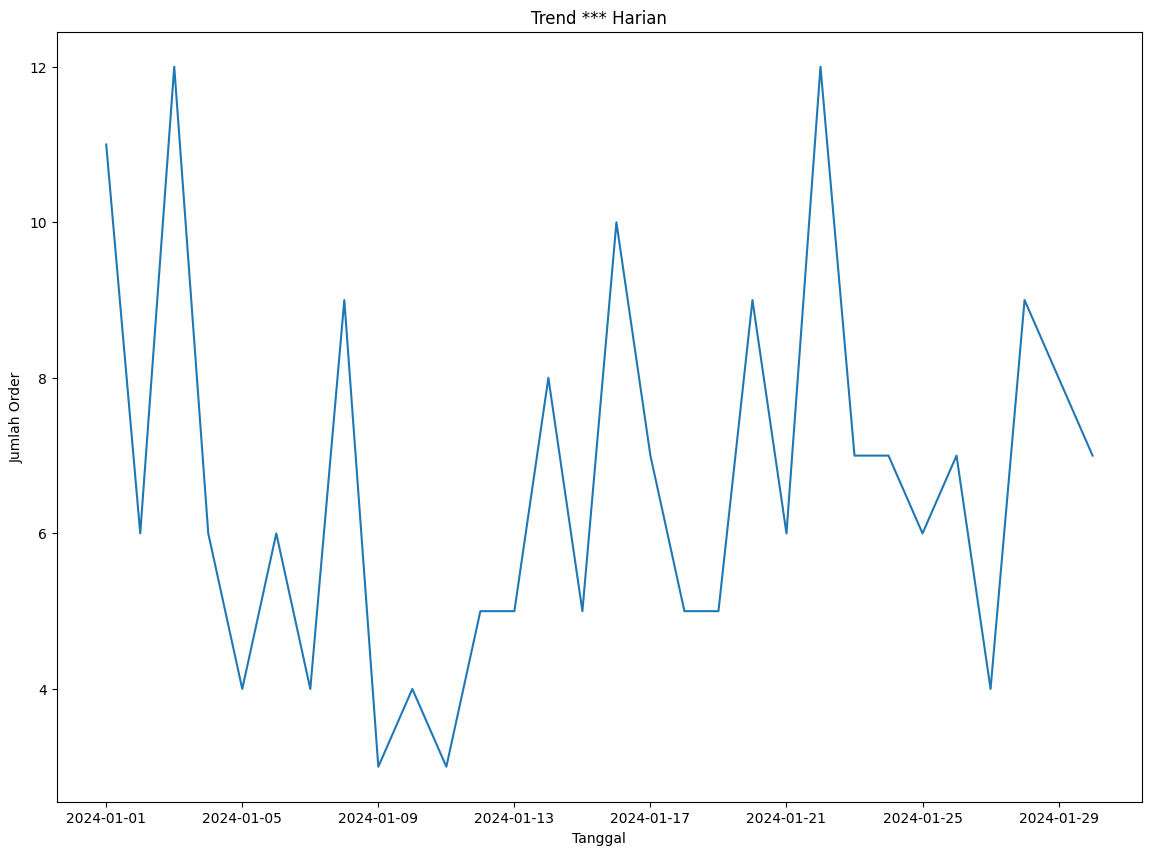

In [25]:
plt.figure(figsize=(14, 10))
plt.plot(order_frequency.index, order_frequency)
plt.title('Trend *** Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Order')
plt.show()

In [26]:
order_total_date = df_orders.groupby("date")["total"].agg(sum)
order_total_date.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13572\3856550238.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  order_total_date = df_orders.groupby("date")["total"].agg(sum)


date
2024-01-01    3462000
2024-01-02    1763000
2024-01-03    3246000
2024-01-04    1634000
2024-01-05    1777000
Name: total, dtype: int64

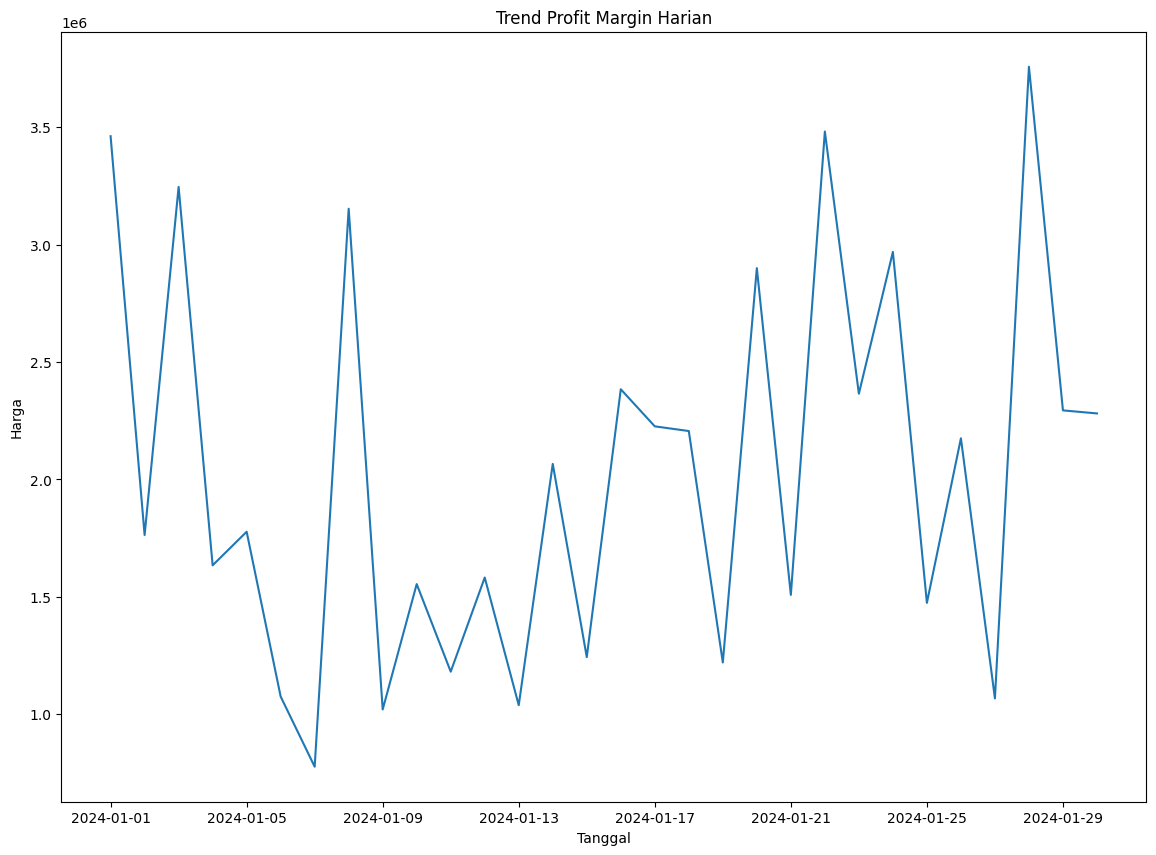

In [27]:
plt.figure(figsize=(14, 10))
plt.plot(order_total_date.index, order_total_date)
plt.title('Trend Profit Margin Harian')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.show()

In [75]:
df_usia_lokasi = df_customers.groupby("city")["age"]
data_usia_lokasi = []
for i in df_usia_lokasi:
    print(i[0])
    for x in i[1]:
        print(x)
data_usia_lokasi

Bali
20.0
40.0
23.0
50.0
48.0
19.0
Bandung
49.0
26.0
Batam
54.0
29.0
49.0
23.0
20.0
28.0
Bogor
49.0
28.0
50.0
Depok
50.0
19.0
54.0
19.0
36.0
19.0
33.0
45.0
42.0
18.0
29.0
36.0
33.0
36.09090909090909
Jakarta
49.0
18.0
43.0
22.0
37.0
52.0
36.09090909090909
Jogja
49.0
28.0
37.0
22.0
Malang
34.0
51.0
33.0
36.0
28.0
Medan
34.0
19.0
50.0
41.0
39.0
20.0
36.0
18.0
40.0
43.0
54.0
36.09090909090909
Semarang
35.0
47.0
49.0
52.0
Solo
41.0
45.0
23.0
43.0
49.0
24.0
50.0
24.0
33.0
Surabaya
32.0
41.0
26.0
46.0
20.0
Tangerang
54.0
21.0
53.0


[]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13572\4286676736.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


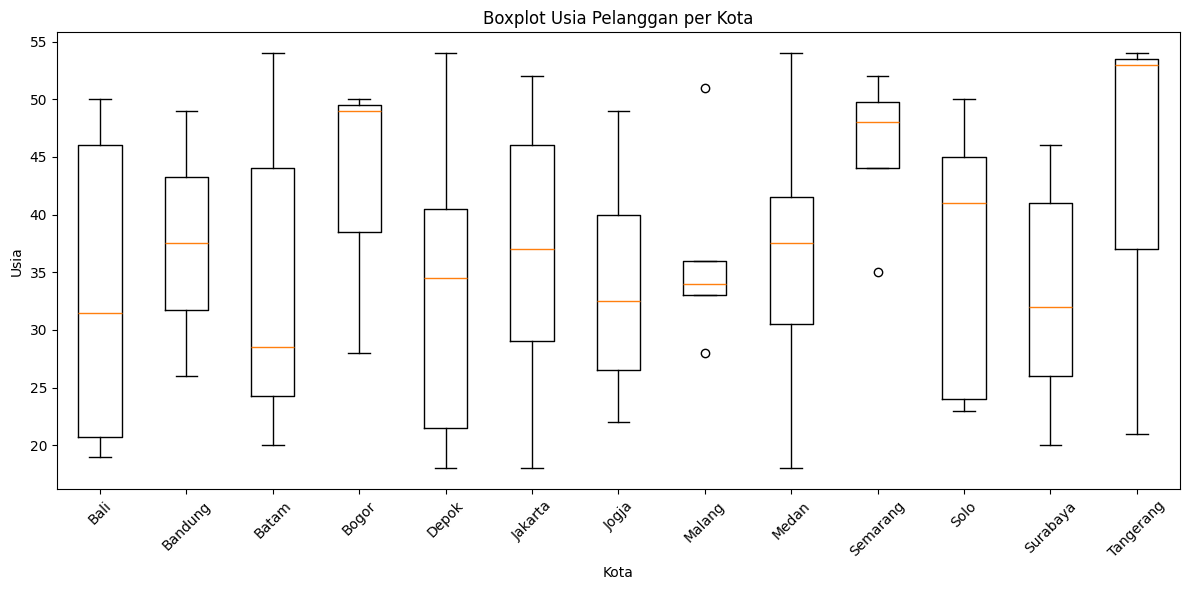

In [ ]:
# Group ages by city and prepare data for boxplot
grouped = df_customers.groupby('city')['age']
data = [grp.dropna().values for _, grp in grouped]
labels = [name for name, _ in df_customers.groupby('city')]

plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=labels)
plt.title('Boxplot Usia Pelanggan per Kota')
plt.xlabel('Kota')
plt.ylabel('Usia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Group ages by city and prepare data for boxplot
grouped = df_orders.groupby('category')['unit_price']
data = [grp.dropna().values for _, grp in grouped]
labels = [name for name, _ in df_orders.groupby('category')]

plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=labels)
plt.title('Boxplot Usia Pelanggan per Kota')
plt.xlabel('Kota')
plt.ylabel('Usia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

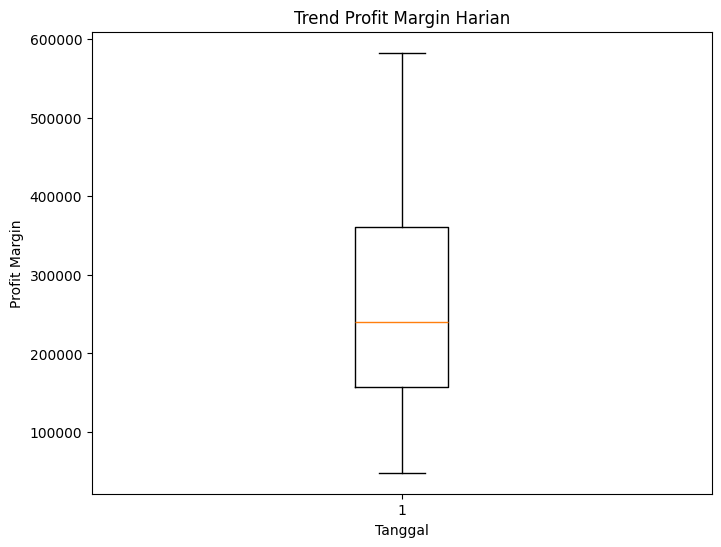

In [29]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_orders["unit_price"])
plt.title('Boxplot Harga Barang')
plt.xlabel('Barang')
plt.ylabel('Harga')
plt.show()

### Bar Plot

In [30]:
join_frequency = df_customers['join_date'].value_counts().sort_index()
join_frequency.head()

join_date
2023-06-05    1
2023-06-06    1
2023-06-08    2
2023-06-13    2
2023-06-15    1
Name: count, dtype: int64

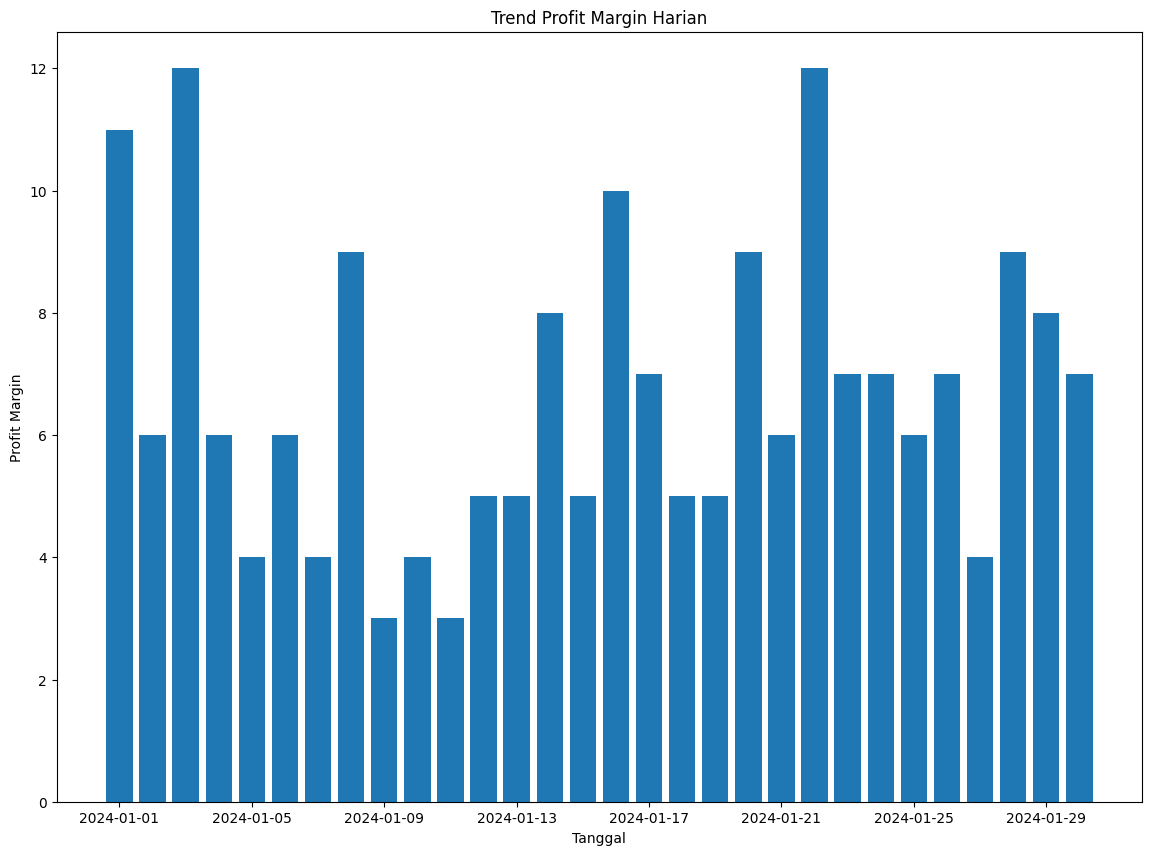

In [31]:
plt.figure(figsize=(14, 10))
plt.bar(order_frequency.index, order_frequency)
plt.title('Trend Profit Margin Harian')
plt.xlabel('Tanggal')
plt.ylabel('Profit Margin')
plt.show()

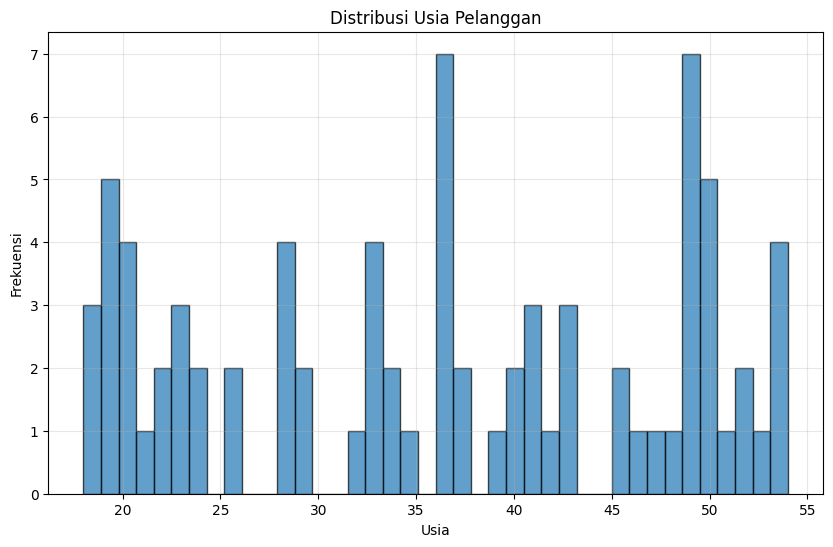

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df_customers['age'], bins=40, edgecolor='black', alpha=0.7)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

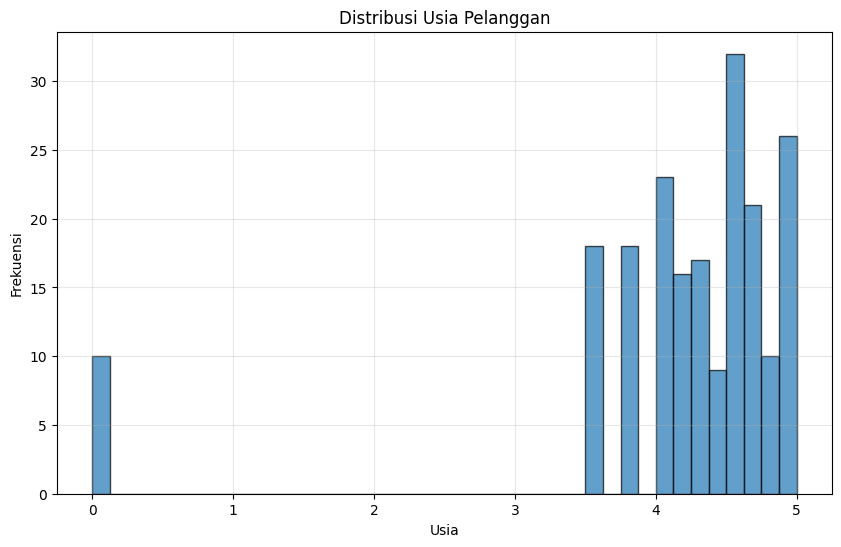

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df_orders['rating'], bins=40, edgecolor='black', alpha=0.7)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

COLLECT ONLY NUMERIC

In [34]:
df_numeric = data_merge_inner

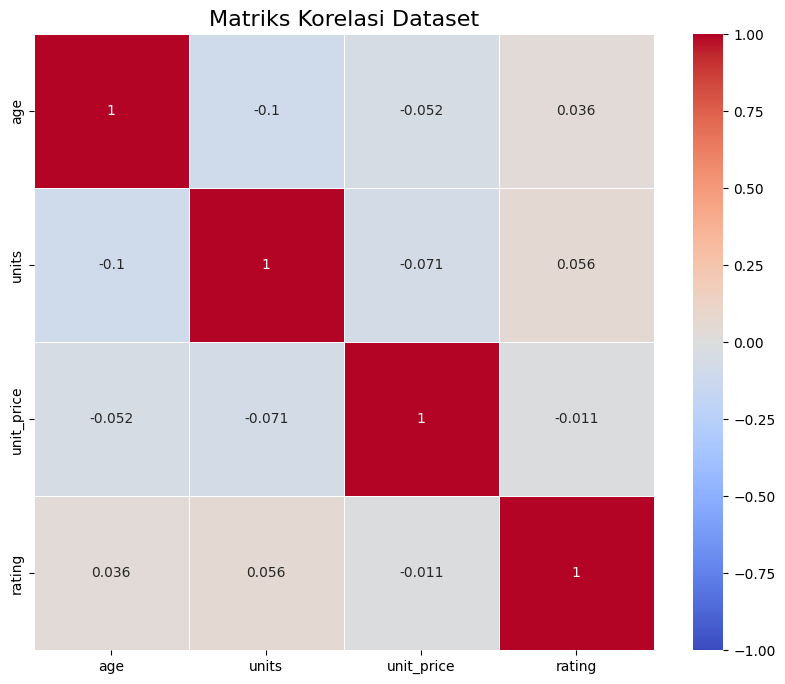

In [35]:
# Matriks Korelasi
# Melihat seberapa erat hubungan pergerakan antar saham
correlation = data_merge_inner.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriks Korelasi Dataset', fontsize=16)
plt.show()

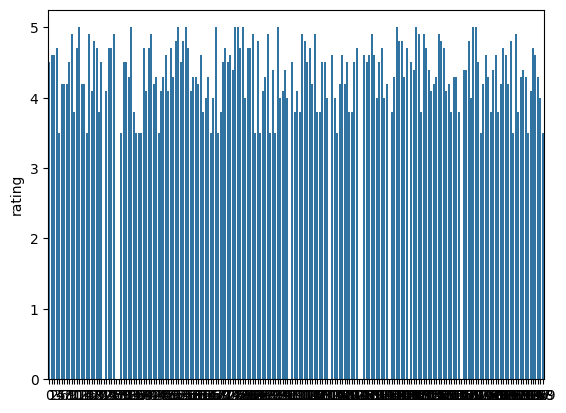

In [36]:
sns.barplot(df_orders['rating'],)
plt.show()

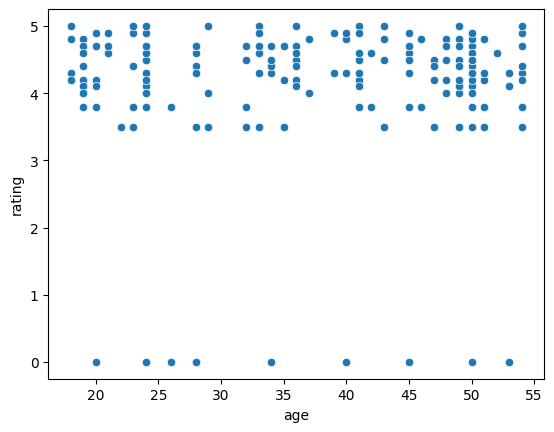

In [37]:
sns.scatterplot(data=data_merge_inner, x="age", y="rating")
plt.show()

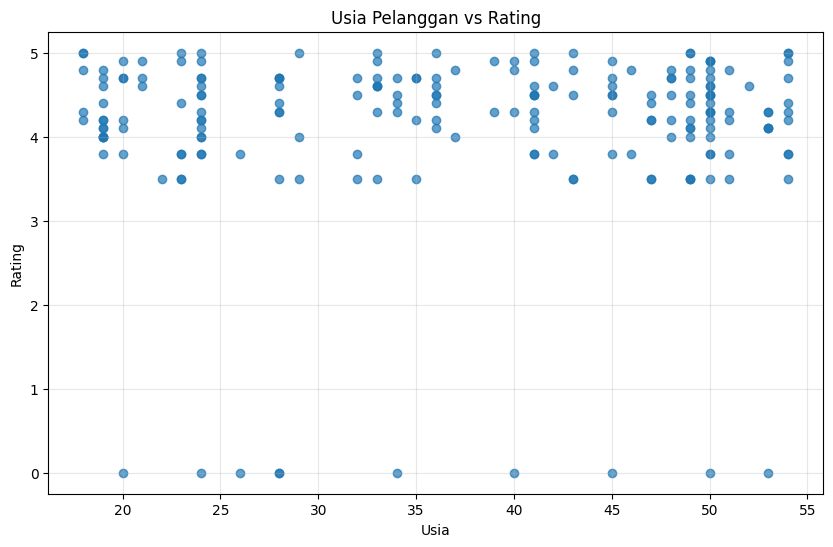

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data_merge_inner['age'], data_merge_inner["rating"], alpha=0.7)
plt.title('Usia Pelanggan vs Rating')
plt.xlabel('Usia')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)
plt.show()

## Numpy

In [39]:
# Contoh dengan fungsi random dari numpy (lebih cepat)
jumlah_sample = 100

rng = np.random.default_rng(seed=42)
nums = rng.integers(1,10,size=jumlah_sample)

print(f"Shape awal: {np.shape(nums)}")

nums = nums.reshape(10, 5, 2)
print(f"Shape setelah reshape: {np.shape(nums)}")

nums =  nums.flatten()
print(f"Shape setelah flatten: {np.shape(nums)}")

Shape awal: (100,)
Shape setelah reshape: (10, 5, 2)
Shape setelah flatten: (100,)


In [40]:
nums[nums > 5]

array([7, 6, 8, 7, 9, 7, 7, 7, 8, 8, 9, 8, 6, 8, 8, 8, 8, 6, 7, 7, 9, 9,
       7, 8, 7, 7, 7, 9, 7, 9, 9, 8, 7, 6, 7, 9, 8, 6, 7, 7, 8, 8, 8, 9,
       7, 6])

In [41]:

for i in np.unique(nums):
    print(f"Data {i} ada sebanyak {len(nums[nums == i])}")
    


Data 1 ada sebanyak 9
Data 2 ada sebanyak 10
Data 3 ada sebanyak 8
Data 4 ada sebanyak 13
Data 5 ada sebanyak 14
Data 6 ada sebanyak 6
Data 7 ada sebanyak 17
Data 8 ada sebanyak 14
Data 9 ada sebanyak 9


## Monte Carlo

In [42]:
jumlah_sample = 100

def simulate_two_dice(num_sample):
  rng = np.random.default_rng(seed=727)
  nums = rng.integers(1, 7, size=num_sample)
  
    
  unique, counts = np.unique(nums, return_counts=True)
  probability = counts/num_sample
  
  return unique, counts, probability

def visualize_two_dice(unique, probability, num_sample):
  df = pd.DataFrame({
    "sum": np.tile(unique, 2),
    "probability": np.concat([np.array([1,2,3,4,5,6,5,4,3,2,1])/36, probability]),
    "type": ["teoritis"]*11 + ["simulasi"]*11
  })

  plt.figure(figsize=(4, 3))
  sns.barplot(data=df, x="sum", y="probability", hue="type")
  plt.xlabel("Jumlah dua dadu")
  plt.ylabel("Frekuensi")
  plt.title(f"Perbandingan Frekuensi Teoretis vs Simulasi (Jumlah Sampel: {num_sample})")
  plt.legend()
  plt.show()

In [43]:
import random

def simulasi_pabrik_botol(jumlah_sampel):
    produk_berhasil = 0
    
    print(f"Memulai simulasi untuk {jumlah_sampel:,} botol...")
    
    for i in range(jumlah_sampel):
        # --- Tahap 1: Cetak Body Botol ---
        # 95% Berhasil
        if random.random() > 0.95:
            continue # Gagal, lanjut ke botol berikutnya (scrap)
            
        # --- Tahap 2: Pemasangan Tutup Botol ---
        # 98% Berhasil
        if random.random() > 0.98:
            continue # Gagal (scrap)
            
        # --- Tahap 3: Uji Tahan Benturan & Perbaikan ---
        # Ini adalah loop karena jika masuk perbaikan, dia harus diuji lagi
        lolos_uji = False
        dibuang_saat_perbaikan = False
        
        while not lolos_uji:
            # Masuk Uji Tahan Benturan
            acak_uji = random.random()
            
            if acak_uji <= 0.80:
                # 80% Lolos
                lolos_uji = True
            else:
                # 20% Cacat -> Masuk Perbaikan Ulang
                # Cek probabilitas keberhasilan perbaikan (70%)
                if random.random() <= 0.70:
                    # Berhasil diperbaiki, loop berulang (kembali ke Uji Tahan Benturan)
                    pass 
                else:
                    # 30% Gagal perbaikan -> Dibuang
                    dibuang_saat_perbaikan = True
                    break # Keluar dari loop while
        
        # Jika keluar loop karena dibuang, lanjut ke sampel berikutnya
        if dibuang_saat_perbaikan:
            continue
            
        # --- Tahap 4: Pemasangan Label ---
        # 99% Berhasil
        if random.random() > 0.99:
            continue # Gagal (scrap)
            
        # --- FINISH ---
        # Jika sampai di sini, botol berhasil diproduksi
        produk_berhasil += 1

    # Menghitung Probabilitas
    probabilitas = (produk_berhasil / jumlah_sampel) * 100
    
    return produk_berhasil, probabilitas

# --- KONFIGURASI UTAMA ---
JUMLAH_SIMULASI = 1_000_000  # 1 Juta sampel sesuai permintaan soal

# Menjalankan fungsi
total_sukses, persentase_sukses = simulasi_pabrik_botol(JUMLAH_SIMULASI)

# Menampilkan Hasil
print("-" * 30)
print("HASIL SIMULASI MONTE CARLO")
print("-" * 30)
print(f"Total Sampel Input : {JUMLAH_SIMULASI:,} botol")
print(f"Total Produk Jadi  : {total_sukses:,} botol")
print(f"Probabilitas Sukses: {persentase_sukses:.2f}%")
print("-" * 30)

Memulai simulasi untuk 1,000,000 botol...
------------------------------
HASIL SIMULASI MONTE CARLO
------------------------------
Total Sampel Input : 1,000,000 botol
Total Produk Jadi  : 857,449 botol
Probabilitas Sukses: 85.74%
------------------------------


In [44]:
random.random()

0.2818932442967096